In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from first_glance import report
from co2_module import functions
from co2_module.functions import country_demo

In [3]:
# Initial look using first_glance stats_report
report.stats_report('global_co2.csv')

,entry_count,data_type,null_count,mean,std,min,25%,50%,75%,max
country,48058,object,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,48058,int64,0,1.926843e+03,5.941485e+01,1750.0,1.883000e+03,1.930000e+03,1.976000e+03,2.022000e+03
population,48058,float64,8563,6.083223e+07,3.285867e+08,222.0,3.464375e+05,2.456362e+06,1.008038e+07,7.975105e+09
gdp,48058,float64,33494,2.677586e+11,2.103151e+12,49980000.0,7.516679e+09,2.597999e+10,1.132942e+11,1.136302e+14
cement_co2,48058,float64,24294,9.109400e+00,6.646355e+01,0.0,0.000000e+00,2.900000e-02,8.340000e-01,1.692404e+03
co2,48058,float64,17750,3.912722e+02,1.855825e+03,0.0,1.830000e-01,3.856000e+00,4.727725e+01,3.714979e+04
coal_co2,48058,float64,22983,1.569639e+02,7.657201e+02,0.0,0.000000e+00,7.030000e-01,1.698800e+01,1.521930e+04
gas_co2,48058,float64,22975,5.127810e+01,3.160338e+02,0.0,0.000000e+00,0.000000e+00,1.344500e+00,7.922112e+03
oil_co2,48058,float64,22947,1.129207e+02,6.294511e+02,0.0,8.400000e-02,1.323000e+00,1.391600e+01,1.237795e+04
share_global_co2,48058,float64,19563,5.163432e+00,1.834465e+01,0.0,2.000000e-03,3.700000e-02,5.180000e-01,1.000000e+02


In [4]:
df = pd.read_csv('global_co2.csv')

In [5]:
# Creating a regex pattern to filter out specific entries from the DataFrame
exclude_list = ['World', 'Europe', 'countries', 'GCP', 'Asia', 'Africa', 'America', 'International']

# Join the list into a single regex pattern
pattern = '|'.join(exclude_list)

# Create a copy of the original DataFrame to work on
co2_df = df.copy()
#co2_df['year'] = pd.to_datetime(co2_df['year'], format='%Y')
# Filter the DataFrame to exclude rows where the 'country' column contains any of the patterns in exclude_list
co2_countries = co2_df[~co2_df['country'].str.contains(pattern, na=False, case=False, regex=True)]

In [6]:
#Cumulative Co2 emissions#
# Top 10 countries ordered by by cumulative co2 
functions.cumulative_co2(co2_countries, 'top', 10)

,country,co2
0,United States,426914.556
1,China,260619.243
2,Russia,119290.814
3,Germany,93985.871
4,United Kingdom,78834.706
5,Japan,67734.911
6,India,59740.694
7,France,39397.693
8,Canada,34613.228
9,Ukraine,30961.508


In [25]:
# Top 10 years of cumulative co2 emissions
co2_df.groupby('year')[['co2', 'coal_co2', 'oil_co2', 'gas_co2', 'cement_co2']].sum().nlargest(10, 'co2').reset_index()

,year,co2,coal_co2,oil_co2,gas_co2,cement_co2
0,2022,237679.814,65615.326,52381.960,37194.995,7033.475
1,2019,236804.780,63757.935,54128.837,36884.891,7054.495
2,2021,236484.697,64734.981,50954.326,38299.411,7396.027
3,2018,235455.960,64199.107,53688.346,36409.482,6852.412
4,2017,231066.766,63263.172,53671.953,34742.105,6590.551
5,2016,227618.087,62590.770,52852.505,33991.622,6489.787
6,2015,227612.884,64096.988,52357.459,33055.487,6324.818
7,2014,227582.200,65481.224,51206.221,32448.060,6552.658
8,2013,226555.346,65565.896,51159.331,32106.497,6313.215
9,2012,225160.414,65333.733,50952.808,32064.065,6068.376


In [26]:
# Bottom 10 years of cumulative co2 emissions
co2_df.groupby('year')[['co2', 'coal_co2', 'oil_co2', 'gas_co2', 'cement_co2']].sum().nsmallest(10, 'co2').reset_index()

,year,co2,coal_co2,oil_co2,gas_co2,cement_co2
0,1750,55.836,55.836,0.0,0.0,0.0
1,1751,56.442,56.442,0.0,0.0,0.0
2,1752,57.030,57.030,0.0,0.0,0.0
3,1753,57.660,57.660,0.0,0.0,0.0
4,1754,58.404,58.404,0.0,0.0,0.0
5,1755,58.758,58.758,0.0,0.0,0.0
6,1756,59.460,59.460,0.0,0.0,0.0
7,1757,60.564,60.564,0.0,0.0,0.0
8,1758,61.296,61.296,0.0,0.0,0.0
9,1759,62.034,62.034,0.0,0.0,0.0


In [8]:
# Yearly emissions percentages by industry
yearly_percent_industry = functions.percent_calc(co2_df.groupby('year').sum(), functions.calculations)
yearly_percent_industry.reset_index()[['year', 'co2', 'coal_prct', 'oil_prct', 'gas_prct', 'cement_prct']]

,year,co2,coal_prct,oil_prct,gas_prct,cement_prct
0,1750,55.836,100.00,0.00,0.00,0.00
1,1751,56.442,100.00,0.00,0.00,0.00
2,1752,57.030,100.00,0.00,0.00,0.00
3,1753,57.660,100.00,0.00,0.00,0.00
4,1754,58.404,100.00,0.00,0.00,0.00
...,...,...,...,...,...,...
268,2018,235455.960,27.27,22.80,15.46,2.91
269,2019,236804.780,26.92,22.86,15.58,2.98
270,2020,224973.704,27.33,21.49,16.22,3.17
271,2021,236484.697,27.37,21.55,16.20,3.13


In [9]:
industry_prct_emiss = functions.percent_calc(co2_countries.copy(), functions.calculations)
industry_prct_emiss

,country,year,population,gdp,cement_co2,co2,coal_co2,gas_co2,oil_co2,share_global_co2,coal_prct,oil_prct,gas_prct,cement_prct
0,Afghanistan,1850,3752993.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1851,3767956.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1852,3783940.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1853,3800954.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1854,3818038.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48053,Zimbabwe,2018,15052191.0,2.271535e+10,0.558,10.715,6.097,0.0,4.060,0.029,56.90,37.89,0.0,5.21
48054,Zimbabwe,2019,15354606.0,NaN,0.473,9.775,5.571,0.0,3.731,0.026,56.99,38.17,0.0,4.84
48055,Zimbabwe,2020,15669663.0,NaN,0.496,7.850,4.309,0.0,3.045,0.022,54.89,38.79,0.0,6.32
48056,Zimbabwe,2021,15993525.0,NaN,0.531,8.396,4.548,0.0,3.317,0.023,54.17,39.51,0.0,6.32


In [29]:
functions.industry_perct_emiss_country('United States', industry_prct_emiss)

,country,year,co2,coal_prct,oil_prct,gas_prct,cement_prct
45556,United States,1800,0.253,100.00,0.00,0.00,0.00
45557,United States,1801,0.267,100.00,0.00,0.00,0.00
45558,United States,1802,0.289,100.00,0.00,0.00,0.00
45559,United States,1803,0.297,100.00,0.00,0.00,0.00
45560,United States,1804,0.333,100.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...
45774,United States,2018,5377.797,23.37,44.00,30.11,0.72
45775,United States,2019,5262.145,20.37,44.87,31.84,0.78
45776,United States,2020,4714.628,18.62,43.43,35.13,0.86
45777,United States,2021,5032.213,19.96,44.49,32.97,0.82


/opt/homebrew/Caskroom/miniforge/base/envs/ava/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/Caskroom/miniforge/base/envs/ava/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='year', ylabel='coal_prct'>

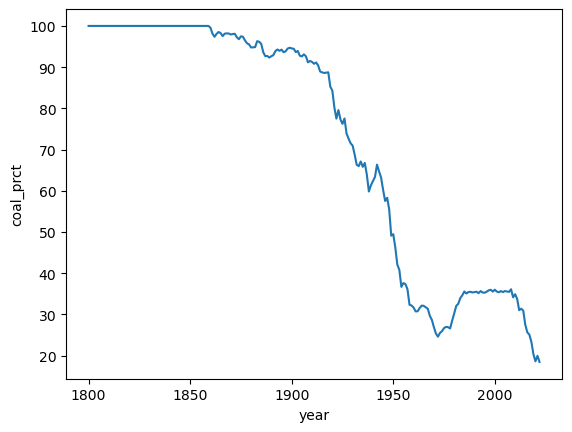

In [40]:
sns.lineplot(x=functions.industry_perct_emiss_country('United States', industry_prct_emiss)['year'], y=functions.industry_perct_emiss_country('United States', industry_prct_emiss)['coal_prct'])

In [36]:
functions.industry_perct_emiss_country('China', industry_prct_emiss)

,country,year,co2,coal_prct,oil_prct,gas_prct,cement_prct
9007,China,1907,19.894,100.00,0.00,0.00,NaN
9008,China,1908,22.736,100.00,0.00,0.00,NaN
9009,China,1909,24.252,100.00,0.00,0.00,NaN
9010,China,1910,25.009,100.00,0.00,0.00,NaN
9011,China,1911,24.631,100.00,0.00,0.00,NaN
...,...,...,...,...,...,...,...
9118,China,2018,10353.935,70.66,14.49,5.56,7.60
9119,China,2019,10721.042,70.17,14.55,5.88,7.71
9120,China,2020,10914.012,70.36,13.96,6.20,7.86
9121,China,2021,11336.233,70.39,13.80,6.74,7.52


/opt/homebrew/Caskroom/miniforge/base/envs/ava/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/Caskroom/miniforge/base/envs/ava/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='year', ylabel='coal_prct'>

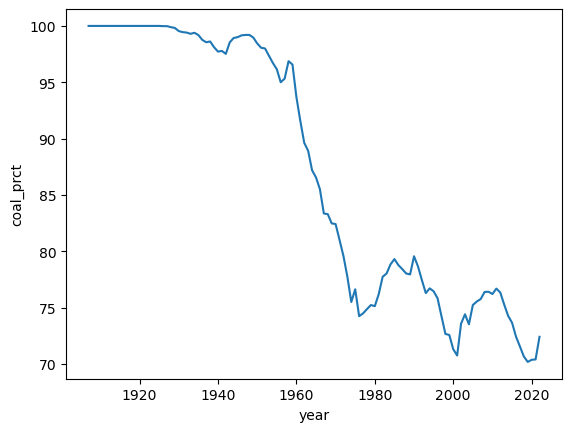

In [41]:
sns.lineplot(x=functions.industry_perct_emiss_country('China', industry_prct_emiss)['year'], y=functions.industry_perct_emiss_country('China', industry_prct_emiss)['coal_prct'])

In [11]:
per_cap_country = functions.per_capita_creation(co2_countries.copy())

In [42]:
# Selecting highest 10 years of co2 per capita in Canada
per_cap_country[(per_cap_country['co2_per_capita'].notnull()) & (per_cap_country['country'] == 'China')].nlargest(10, 'co2_per_capita')\
[['country', 'year', 'co2_per_capita']]

,country,year,co2_per_capita
4845,China,2022,7.99
4844,China,2021,7.95
4843,China,2020,7.66
4842,China,2019,7.54
4841,China,2018,7.31
4836,China,2013,7.24
4837,China,2014,7.22
4835,China,2012,7.16
4840,China,2017,7.10
4838,China,2015,7.08


In [13]:
functions.per_cap_by_year(per_cap_country, 'top', 15, 2020)

,year,country,co2,co2_per_capita
0,2020,Qatar,102.501,37.13
1,2020,Bahrain,37.396,25.31
2,2020,Brunei,11.102,25.13
3,2020,United Arab Emirates,216.768,23.34
4,2020,Trinidad and Tobago,35.030,23.07
5,2020,Kuwait,97.712,22.41
6,2020,New Caledonia,5.109,17.84
7,2020,Saudi Arabia,610.773,16.97
8,2020,Australia,396.685,15.45
9,2020,Sint Maarten (Dutch part),0.652,14.94


In [14]:
functions.per_cap_by_year(per_cap_country, 'bottom', 10, 2020)

,year,country,co2,co2_per_capita
0,2020,Democratic Republic of Congo,3.710,0.04
1,2020,Somalia,0.597,0.04
2,2020,Burundi,0.736,0.06
3,2020,Malawi,1.871,0.10
4,2020,Rwanda,1.372,0.10
5,2020,Niger,2.817,0.12
6,2020,Sierra Leone,1.026,0.12
7,2020,Uganda,5.538,0.12
8,2020,Chad,2.279,0.14
9,2020,Madagascar,3.964,0.14


In [15]:
demo_prct_chng = functions.yearly_prct_chng(co2_countries.copy(), functions.column_creation, functions.prct_calculations)

In [46]:
demo_prct_chng[demo_prct_chng['year'] == 2020].nsmallest(30, 'co2_prct_chng')

,country,year,population,pop_prct_chng,gdp,gdp_prct_chng,co2,co2_prct_chng
5670,Bhutan,2020,772512.0,0.66,NaN,NaN,0.920,-36.94
24618,Libya,2020,6653946.0,1.29,NaN,NaN,47.068,-33.26
46918,Venezuela,2020,28490458.0,-1.66,NaN,NaN,61.956,-29.28
15567,Fiji,2020,920430.0,0.21,NaN,NaN,1.041,-26.07
4508,Barbados,2020,280704.0,0.18,NaN,NaN,1.234,-25.97
13380,Estonia,2020,1329449.0,0.18,NaN,NaN,9.239,-25.03
24445,Liberia,2020,5087591.0,2.05,NaN,NaN,0.769,-24.61
5397,Bermuda,2020,64051.0,0.34,NaN,NaN,0.458,-22.90
34340,Panama,2020,4294391.0,1.46,NaN,NaN,10.324,-22.85
1235,Andorra,2020,77723.0,1.78,NaN,NaN,0.374,-22.73


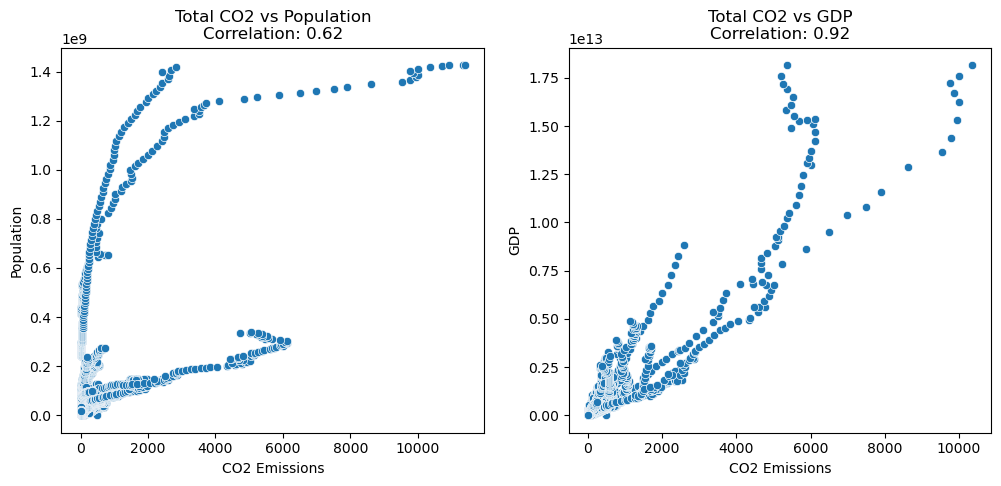

In [17]:
functions.dual_scatter('Total', co2_countries)

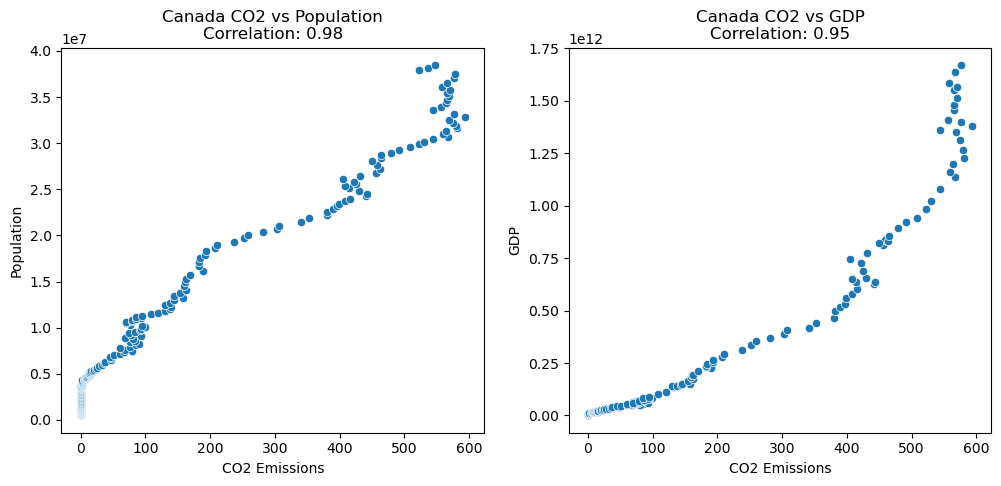

In [18]:
functions.dual_scatter('Canada', co2_countries)

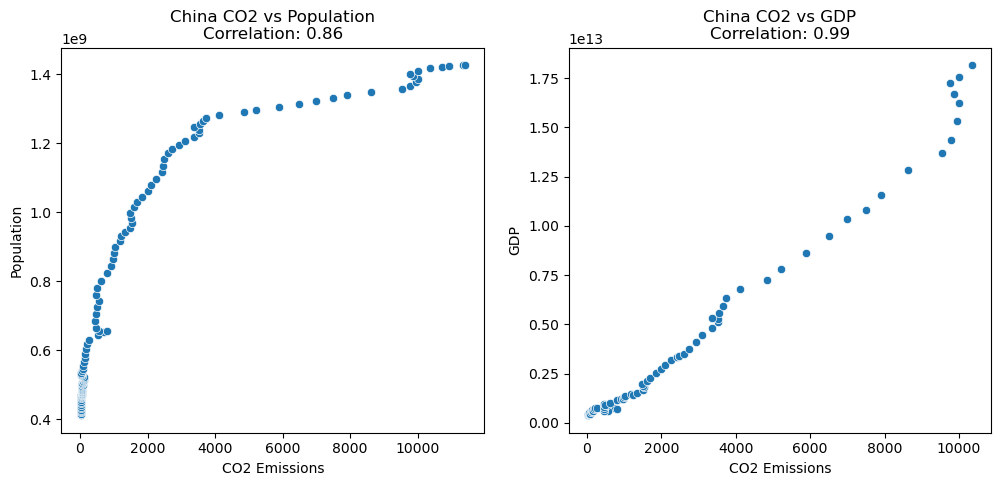

In [19]:
functions.dual_scatter('China', co2_countries)

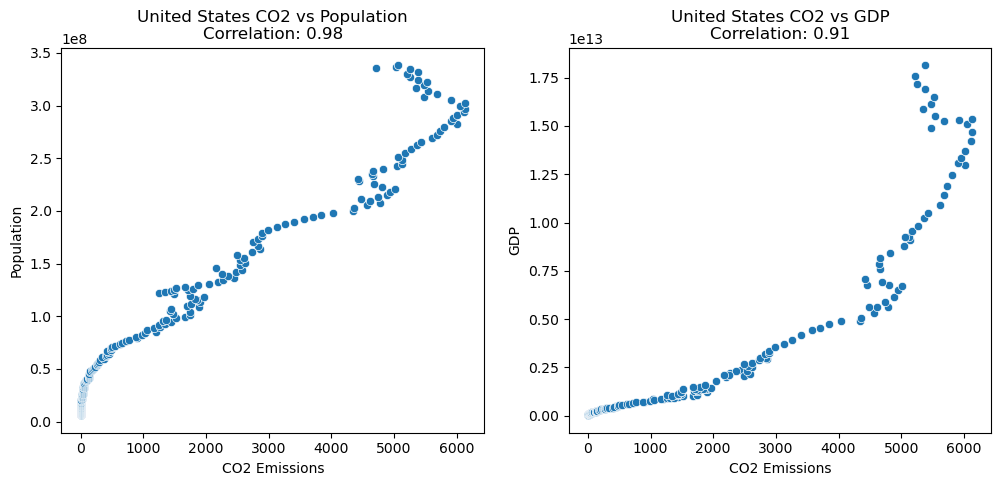

In [20]:
functions.dual_scatter('United States', co2_countries)

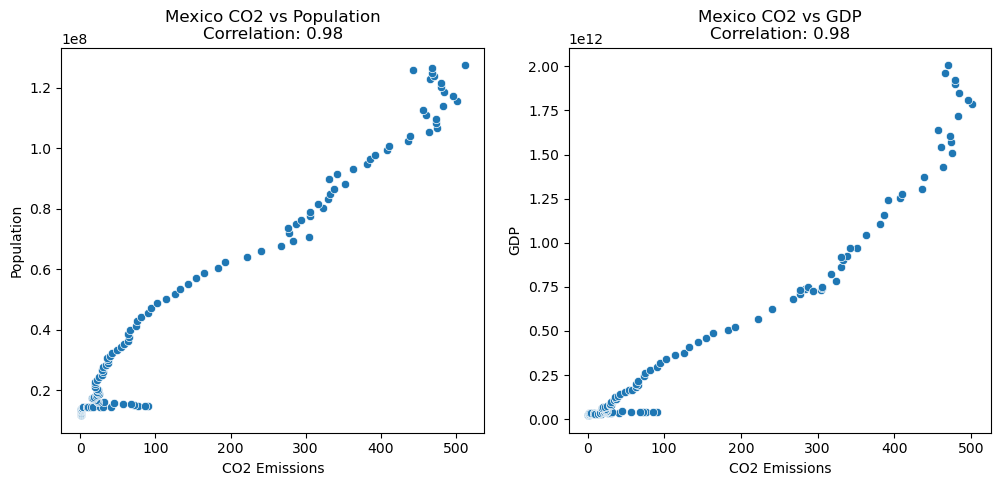

In [21]:
functions.dual_scatter('Mexico', co2_countries)

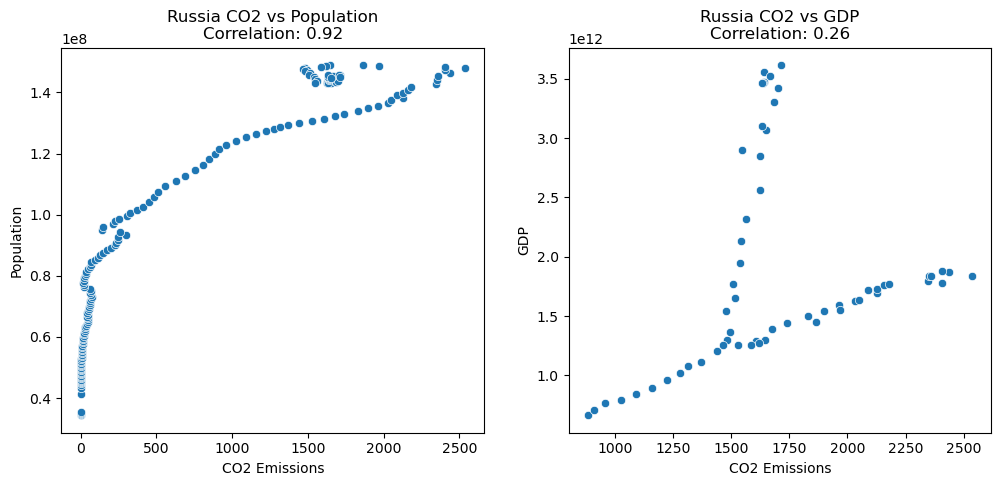

In [22]:
functions.dual_scatter('Russia', co2_countries)